<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/Flower_classifiacation_i%3DTHROUGH_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


## Load the dataset

In [2]:
data = pd.read_csv('/content/iris(1).csv')

##EDA(EXPLATORY DATA ANALYSIS)

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
data.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [5]:
data.isnull().sum()

,0
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


#Converting categorical to numerical so we can use knn

In [8]:
data['variety']=data['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2})


#Choosing the features as x and the target as y

In [9]:
x=data[['sepal.length','sepal.width','petal.length','petal.width']]
y=data['variety']
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20%

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9666666666666667


In [11]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 1.0
Accuracy for k= 2 is: 0.93
Accuracy for k= 3 is: 1.0
Accuracy for k= 4 is: 0.93
Accuracy for k= 5 is: 0.97
Accuracy for k= 6 is: 0.97
Accuracy for k= 7 is: 1.0
Accuracy for k= 8 is: 0.97
Accuracy for k= 9 is: 1.0
Accuracy for k= 10 is: 0.97
Accuracy for k= 11 is: 1.0
Accuracy for k= 12 is: 1.0
Accuracy for k= 13 is: 1.0
Accuracy for k= 14 is: 1.0
Accuracy for k= 15 is: 1.0
Accuracy for k= 16 is: 1.0
Accuracy for k= 17 is: 1.0
Accuracy for k= 18 is: 1.0
Accuracy for k= 19 is: 1.0
Accuracy for k= 20 is: 0.97
Accuracy for k= 21 is: 1.0
Accuracy for k= 22 is: 0.97
Accuracy for k= 23 is: 0.97
Accuracy for k= 24 is: 0.93
Accuracy for k= 25 is: 0.93
Accuracy for k= 26 is: 0.9
Accuracy for k= 27 is: 0.93
Accuracy for k= 28 is: 0.93
Accuracy for k= 29 is: 0.9


Text(0, 0.5, 'Testing Accuracy')

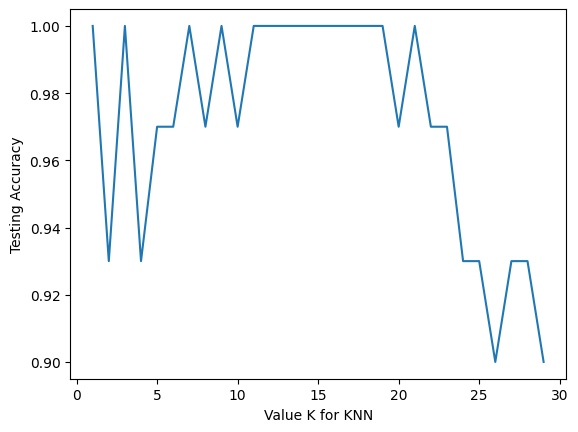

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')